In [1]:
import numpy as np
import cv2

In [2]:
img = []

for i in range(4):
    temp = cv2.imread(str(i + 1) + '.jpg', cv2.IMREAD_GRAYSCALE).flatten()
    img.append(temp)

In [3]:
img = np.array(img)

In [4]:
img.shape

(4, 404248)

In [5]:
aux_img = img.copy()

In [6]:
aux_img = np.array(list(map(lambda x : x - x.mean(), aux_img)))

In [7]:
aux_img = aux_img.T

In [8]:
cov = np.zeros((4, 4))

In [9]:
def find_cov(i, j):
    global aux_img
    
    add = 0
    
    n = aux_img.shape[0]
    for x, y in zip(aux_img[:, i], aux_img[:, j]):
        add += x * y
        
    return add / (n - 1)

In [10]:
n = img.shape[0]

for i in range(n):
    for j in range(n):
        cov[i, j] = find_cov(i, j)

In [11]:
cov

array([[8353.29008033, 8118.451     , 8310.31453878, 7571.4619134 ],
       [8118.451     , 7940.26826925, 8114.74089322, 7430.26482986],
       [8310.31453878, 8114.74089322, 8364.81352538, 7590.85068457],
       [7571.4619134 , 7430.26482986, 7590.85068457, 7428.99864065]])

In [12]:
np.cov(aux_img.T)

array([[8353.29008031, 8118.45099997, 8310.31453877, 7571.46191339],
       [8118.45099997, 7940.26826923, 8114.7408932 , 7430.26482984],
       [8310.31453877, 8114.7408932 , 8364.81352536, 7590.85068456],
       [7571.46191339, 7430.26482984, 7590.85068456, 7428.99864064]])

In [13]:
from numpy import linalg as LA

In [14]:
eigenvals, eigenvecs = LA.eig(cov)

In [15]:
pca = []

for i in range(4):
    temp = np.matmul(eigenvecs[:, i].T, aux_img.T)
    pca.append(temp)
    
pca = np.array(pca)

In [16]:
most = pca[0].reshape(598, 676)

In [17]:
most.shape

(598, 676)

In [18]:
pca[0].shape

(404248,)

In [19]:
import matplotlib.pyplot as plt

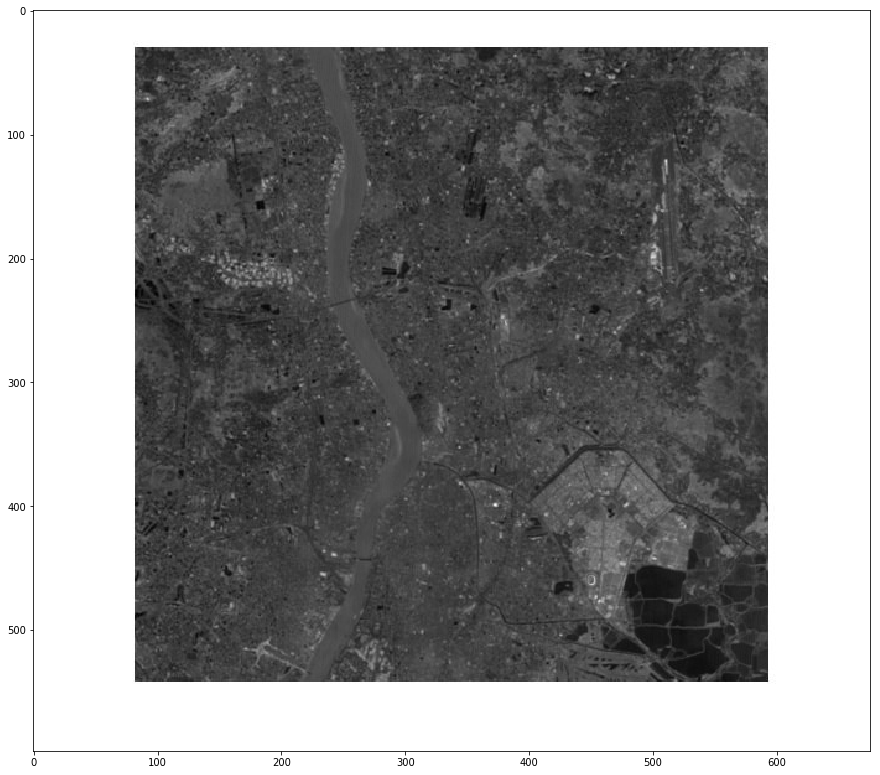

In [20]:
plt.figure(figsize = (15, 15))
plt.imshow(most, cmap = 'gray')

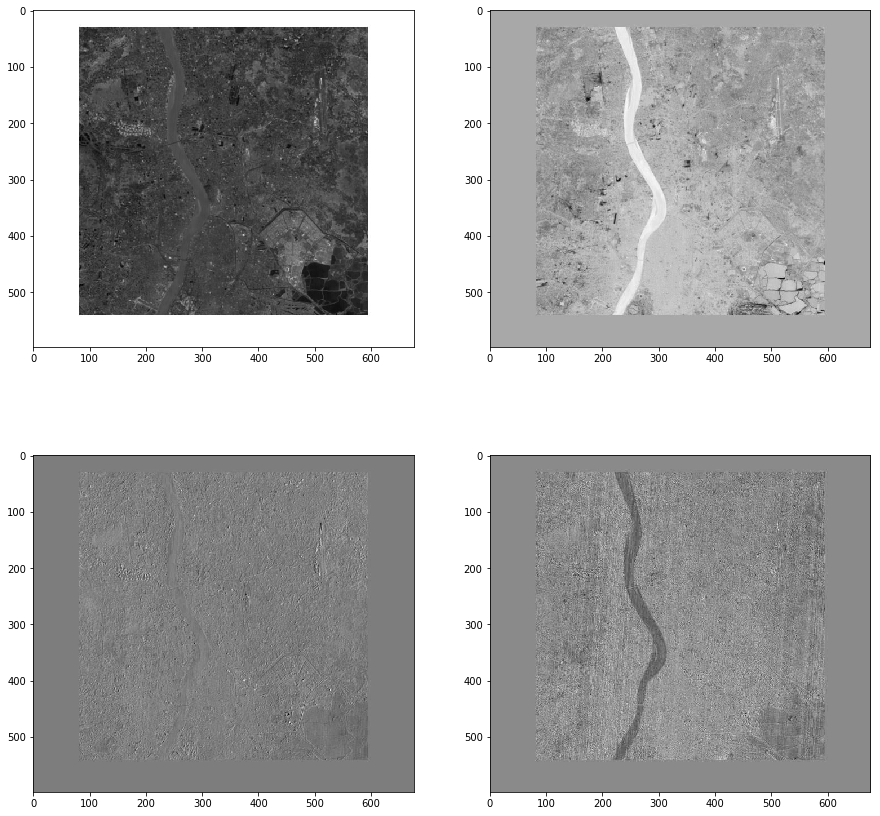

In [21]:
plt.figure(figsize = (15, 15))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(pca[i].reshape(598, 676), cmap = 'gray')